In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split, RandomizedSearchCV, cross_validate
from scipy.stats import randint
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Load Excel data into a DataFrame
excel_file = '/Users/akashborigi/Downloads/UH_Courses/Spring_2024/cohort/rop_data_eur.xlsx'
df1 = pd.read_excel(excel_file)

In [3]:
df1.head(10)

ROP(1 m)  weight on bit (kg)  Temp Out( degC)  Temp In(degC)  \
0     17.31                0.00            34.16          32.71   
1     18.63                0.00            34.18          32.68   
2      5.66                0.00            34.58          32.73   
3     11.67                0.00            34.69          32.86   
4    120.20                0.00            34.71          32.88   
5    125.93                0.00            34.73          32.88   
6    137.37              344.67            34.73          32.89   
7    183.16                0.00            34.73          32.89   
8    121.76                0.00            34.75          32.92   
9    171.72                0.00            34.75          32.94   

   Pit Total (m3)  Pump Press (KPa)  Hookload (kg)  Surface Torque (KPa)  \
0           43.69           3197.35       14408.16                 61.57   
1           43.69           3168.46       14063.49                 61.57   
2           43.53           3134.26       14063.49                 62.12   
3           43.53           3110.61       14131.52                 61.85   
4           43.53           3144.74       14303.85                 61.85   
5           43.53           3118.47       13714.29                 61.85   
6           43.53           3131.64       13301.59                 61.85   
7           43.53           3121.09       14063.49                 62.12   
8           43.53           3094.82       14027.21                 61.85   
9           43.53           3121.09       13959.18                 62.12   

   Rotary Speed (rpm)  Flow In(liters/min)  Flow Out %  WH Pressure (KPa)  \
0              151.09              4200.22      101.61           -8485.61   
1              151.09              4195.60      101.70           -8485.61   
2               61.54              4174.82       96.81           -8485.61   
3               60.23              4167.89       96.67           -8485.61   
4               61.75              4173.26       96.63           -8485.61   
5               61.99              4170.95       96.58           -8485.61   
6               62.07              4171.75       96.72           -8485.61   
7               61.95              4172.51       96.81           -8485.61   
8               61.42              4160.96       96.44           -8485.61   
9               59.57              4174.82       95.93           -8485.61   

   H2S Floor  H2S Cellar  H2S Pits  Depth(m)  
0      -0.01       -0.03      0.31     25.96  
1      -0.01       -0.04      0.31     26.27  
2      -0.01       -0.03      0.30     26.59  
3       0.00       -0.03      0.31     26.90  
4      -0.02       -0.02      0.31     27.24  
5      -0.01       -0.02      0.31     27.55  
6      -0.01       -0.02      0.31     27.85  
7      -0.02       -0.03      0.31     28.16  
8      -0.01       -0.03      0.30     28.49  
9      -0.02       -0.03      0.30     28.83

In [4]:
df1.describe()

ROP(1 m)  weight on bit (kg)  Temp Out( degC)  Temp In(degC)  \
count  7311.000000         7311.000000      7311.000000    7311.000000   
mean     12.804158        10483.764002        52.255297      47.953090   
std      23.139621         4135.825227         6.811023       6.629486   
min       0.000000            0.000000        28.930000      29.440000   
25%       3.470000         8303.850000        46.740000      42.695000   
50%       5.480000        10807.260000        51.590000      47.340000   
75%      13.500000        13460.320000        58.050000      52.700000   
max     907.620000        21337.870000        66.500000      63.510000   

       Pit Total (m3)  Pump Press (KPa)  Hookload (kg)  Surface Torque (KPa)  \
count     7311.000000       7311.000000    7311.000000           7311.000000   
mean        37.668701       8733.444965   36864.214556            903.132323   
std          2.903400       3382.374016   12019.878472            335.832421   
min         27.170000        137.490000   12367.350000              0.000000   
25%         35.700000       4589.240000   24816.330000            806.715000   
50%         37.860000       9877.500000   36344.670000            967.440000   
75%         39.680000      11512.440000   47904.760000           1084.450000   
max         44.500000      15171.960000   67541.950000           1887.230000   

       Rotary Speed (rpm)  Flow In(liters/min)   Flow Out %  \
count         7311.000000          7311.000000  7311.000000   
mean            54.947292          2711.315497    79.692834   
std             25.947654           536.711275    11.909399   
min              0.000000             0.000000     0.690000   
25%             38.090000          2347.940000    72.650000   
50%             50.380000          2650.580000    80.710000   
75%             75.965000          3121.485000    88.845000   
max            271.580000         12558.140000   111.210000   

       WH Pressure (KPa)    H2S Floor   H2S Cellar     H2S Pits     Depth(m)  
count        7311.000000  7311.000000  7311.000000  7311.000000  7311.000000  
mean         -246.571280    -0.027372     0.004303     0.148833  1168.864378  
std          1535.306539     0.042453     0.025282     0.115290   654.527243  
min         -8493.470000    -0.100000    -0.080000    -0.060000    25.960000  
25%            20.130000    -0.070000    -0.010000     0.060000   600.545000  
50%            40.960000    -0.010000     0.000000     0.140000  1173.990000  
75%            56.950000     0.000000     0.020000     0.220000  1734.710000  
max           120.040000     0.780000     0.070000     0.720000  2296.940000

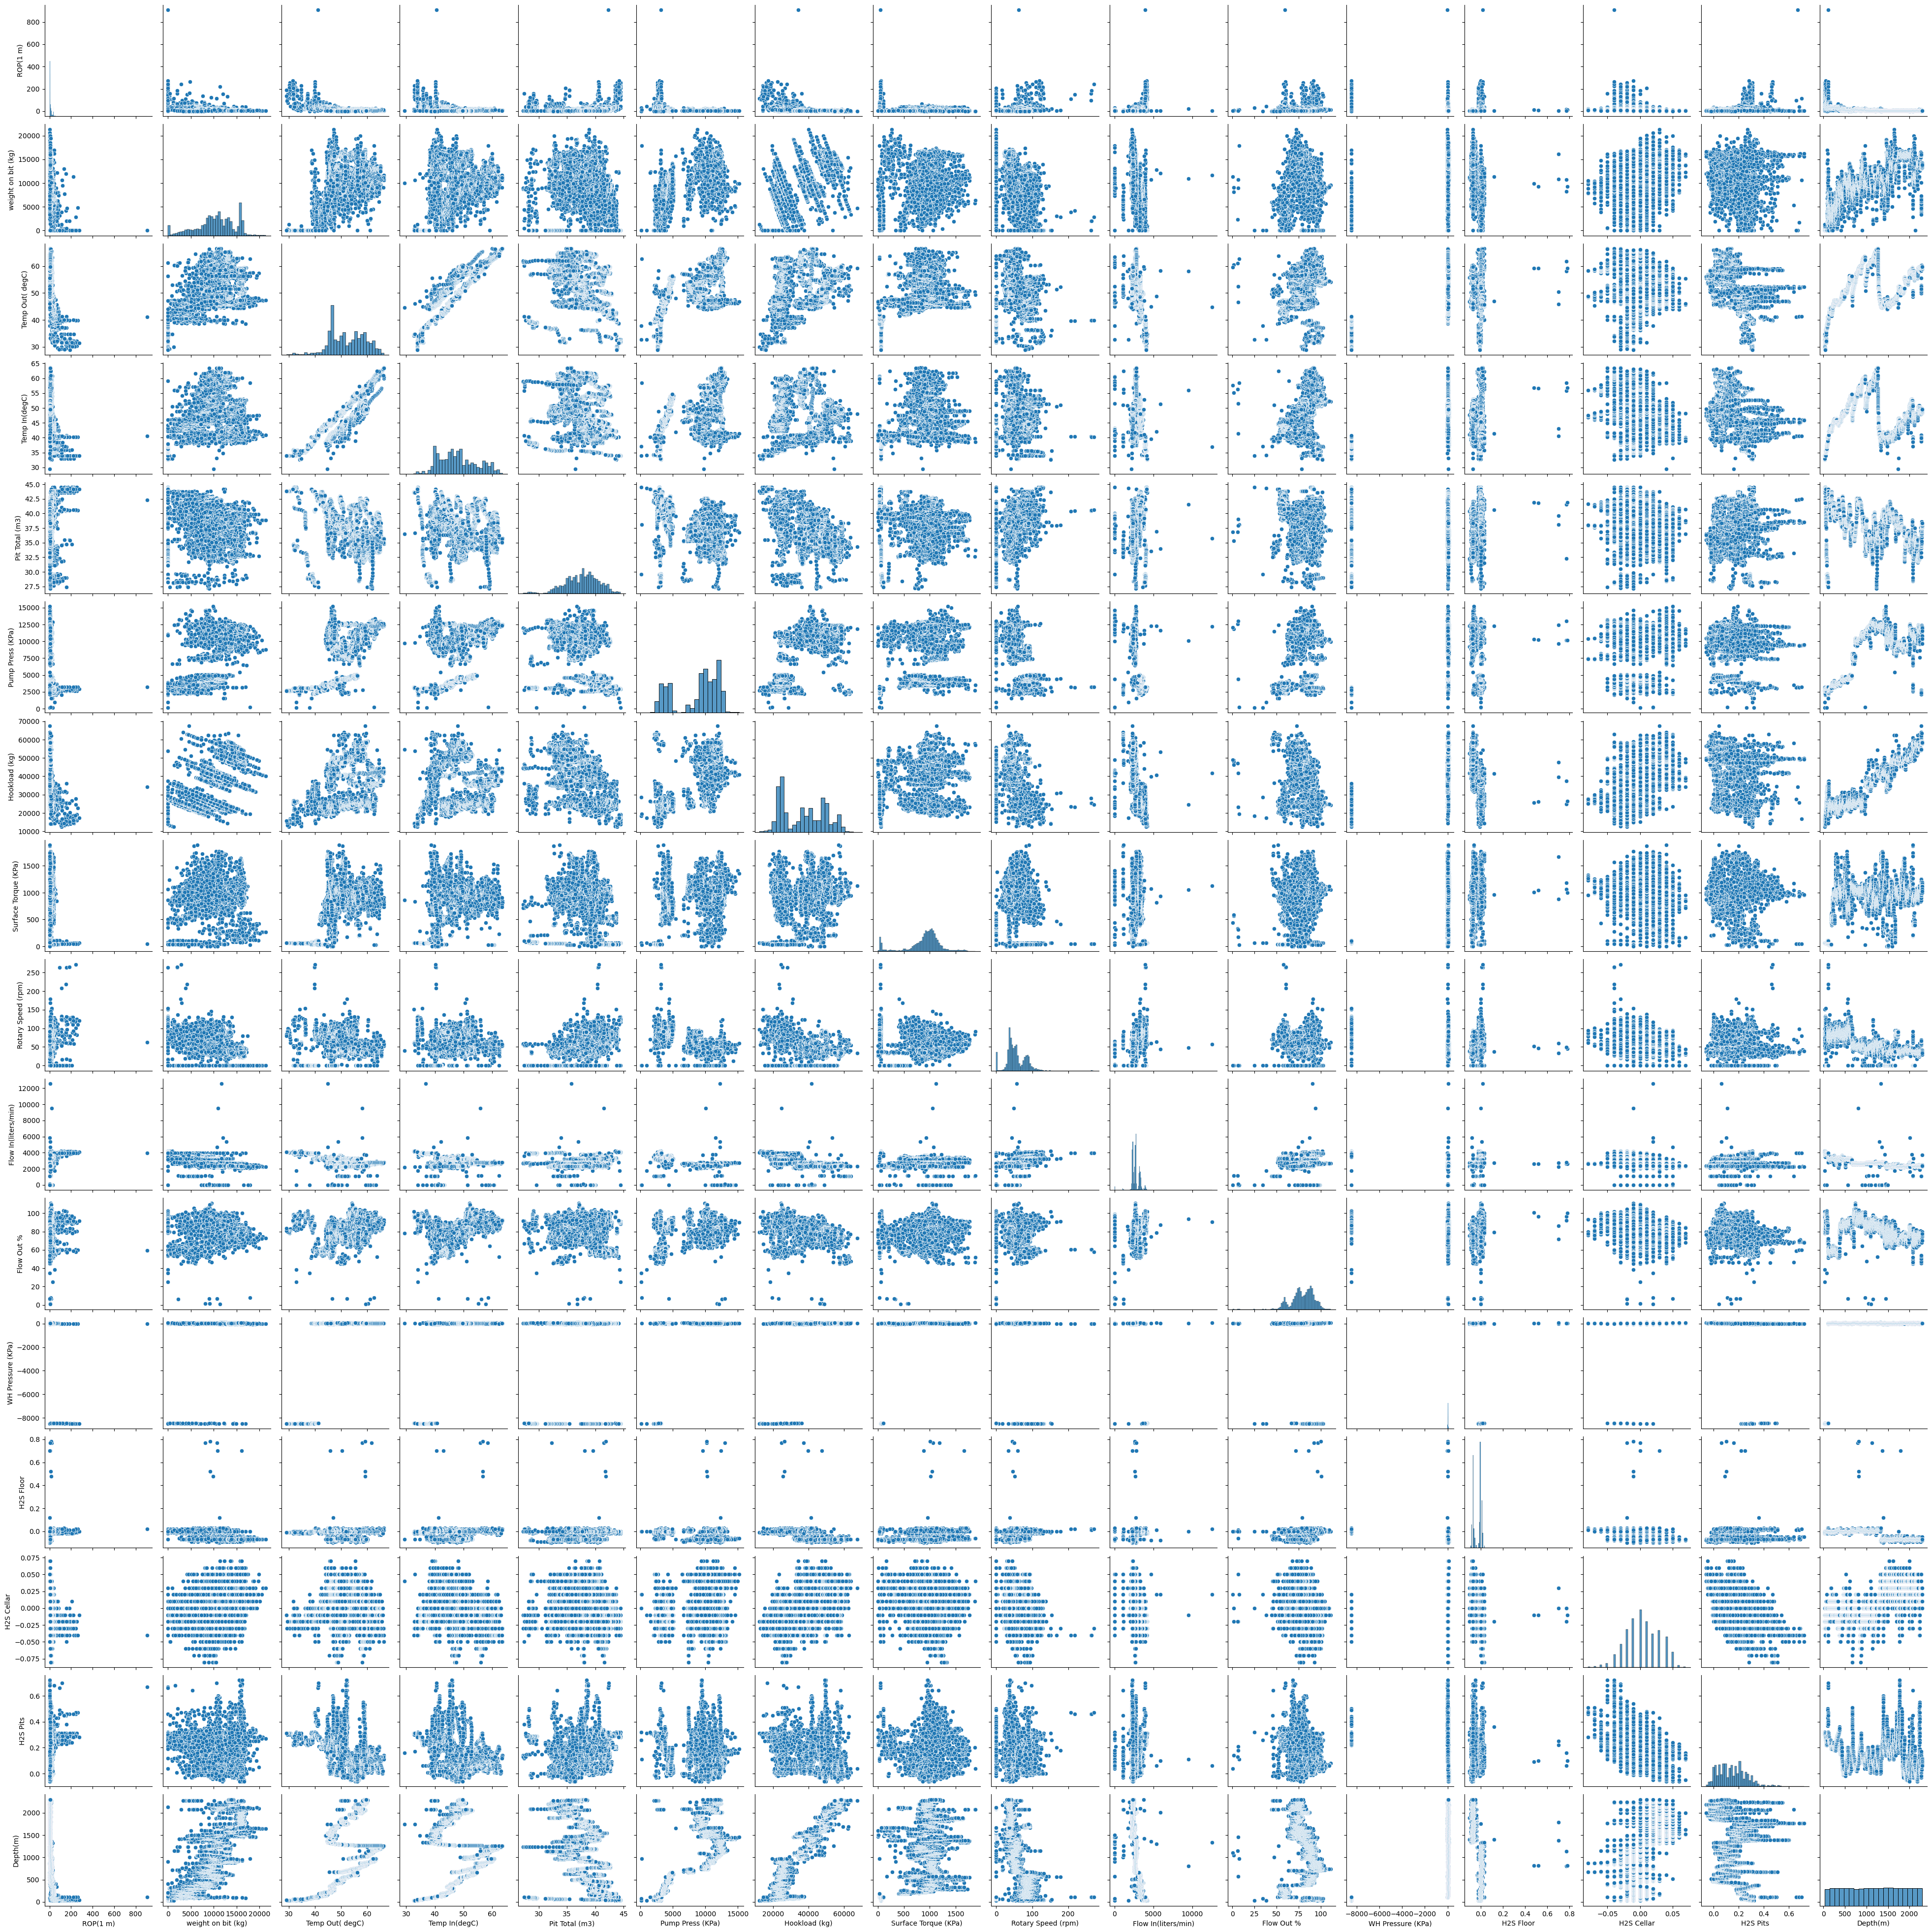

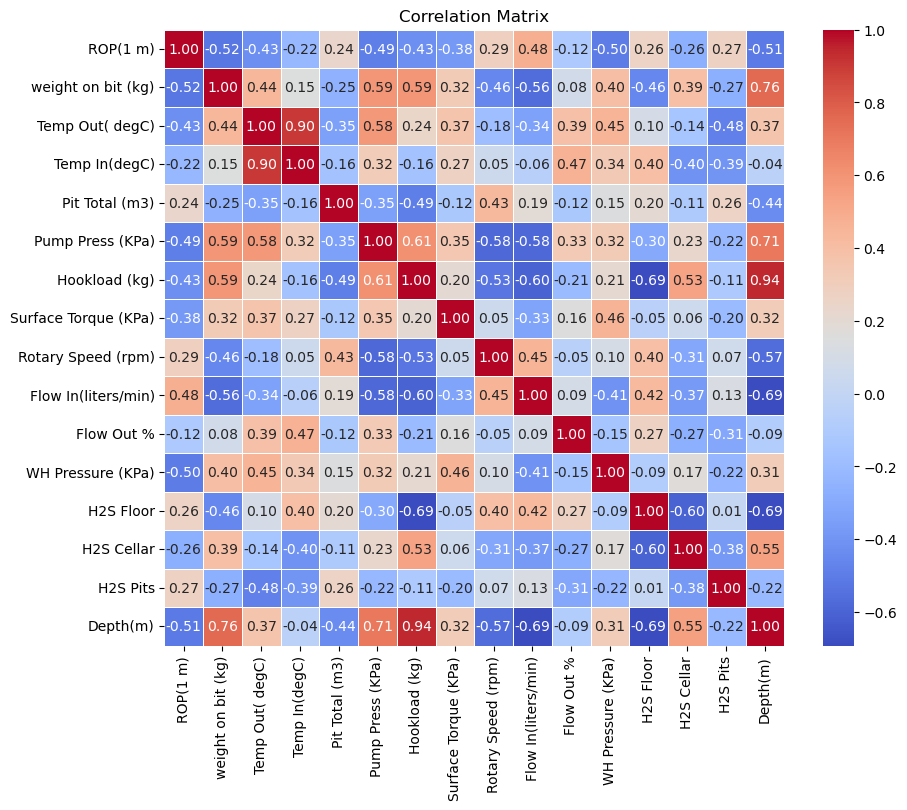

In [5]:
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Display scatterplot matrix
sns.pairplot(df1)
plt.show()

# Calculate correlation matrix
correlation_matrix = df1.corr()

# Display correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Define features (X) and target variable (y)
X1 = df1.drop(columns=["ROP(1 m)"])  # Dropping ROP(1 m) as it's the target variable
y1 = df1["ROP(1 m)"]

# Split data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize linear regression model
model1 = LinearRegression()

# Fit the model on the training data
model1.fit(X_train_1, y_train_1)

# Make predictions on the testing data
prediction1 = model1.predict(X_test_1)

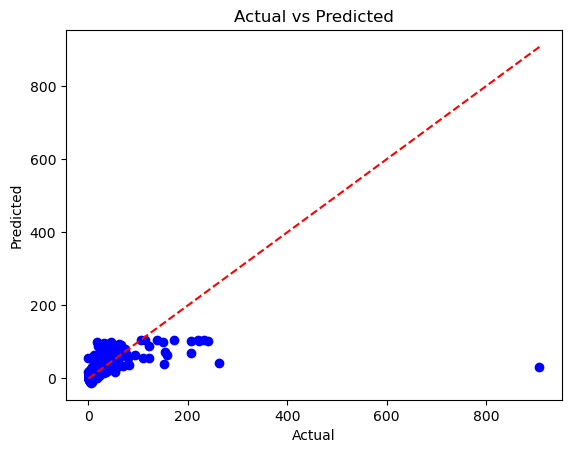

In [7]:
# Plotting actual vs predicted values
plt.scatter(y_test_1, prediction1, color='blue')
plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], linestyle='--', color='red')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [8]:
w1 = model1.coef_
b1 = model1.intercept_

w1, b1

(array([-9.93116594e-04, -1.24955247e+00,  1.07056136e+00,  7.53820619e-01,
         5.00023156e-04, -7.76023443e-04, -5.19044270e-03,  1.33612167e-01,
         4.13518392e-03, -4.99703502e-01, -7.11211096e-03,  2.52901505e+01,
        -8.18972128e+01, -1.13847697e+01,  1.84318482e-02]),
 38.33137620860151)

In [9]:
mse_train = mean_squared_error(y_train_1, model1.predict(X_train_1))
mse_test = mean_squared_error(y_test_1, model1.predict(X_test_1))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

RMSE on the training data: 12.687231814942752

RMSE on the test data: 27.305656057489003


In [10]:
from sklearn.metrics import r2_score
r2_train1 = r2_score(y_train_1, model1.predict(X_train_1))
r2_test1 = r2_score(y_test_1, model1.predict(X_test_1))
print(r2_train1)
print(r2_test1)

0.6057458994282374
0.2844276577462752


### Finding null values and replacing them with mean values

In [11]:
# Assuming df is your DataFrame
# Use describe() to get summary statistics
summary_stats = df1.describe()

# Check if any minimum values are zero
zeros_mask = (summary_stats.loc['min'] == 0)

# Print columns with zero minimum values
print("Columns with zero minimum values:")
print(zeros_mask[zeros_mask].index)

Columns with zero minimum values:
Index(['ROP(1 m)', 'weight on bit (kg)', 'Surface Torque (KPa)',
       'Rotary Speed (rpm)', 'Flow In(liters/min)'],
      dtype='object')


In [12]:
# Replace NaN values with column-wise mean
for column in df1.columns:
    if pd.api.types.is_numeric_dtype(df1[column]):
        # Calculate the mean of the column excluding zeros
        mean_value = df1.loc[df1[column] != 0, column].mean()
        # Replace zeros with the mean value
        df1[column] = df1[column].replace(0, mean_value)

In [13]:
df1.describe()

ROP(1 m)  weight on bit (kg)  Temp Out( degC)  Temp In(degC)  \
count  7311.000000         7311.000000      7311.000000    7311.000000   
mean     12.812921        10775.593789        52.255297      47.953090   
std      23.137197         3747.686908         6.811023       6.629486   
min       0.220000          181.410000        28.930000      29.440000   
25%       3.480000         8609.975000        46.740000      42.695000   
50%       5.490000        10807.260000        51.590000      47.340000   
75%      13.500000        13460.320000        58.050000      52.700000   
max     907.620000        21337.870000        66.500000      63.510000   

       Pit Total (m3)  Pump Press (KPa)  Hookload (kg)  Surface Torque (KPa)  \
count     7311.000000       7311.000000    7311.000000           7311.000000   
mean        37.668701       8733.444965   36864.214556            903.874115   
std          2.903400       3382.374016   12019.878472            334.833371   
min         27.170000        137.490000   12367.350000              1.100000   
25%         35.700000       4589.240000   24816.330000            807.610000   
50%         37.860000       9877.500000   36344.670000            967.440000   
75%         39.680000      11512.440000   47904.760000           1084.450000   
max         44.500000      15171.960000   67541.950000           1887.230000   

       Rotary Speed (rpm)  Flow In(liters/min)   Flow Out %  \
count         7311.000000          7311.000000  7311.000000   
mean            57.959840          2737.148246    79.692834   
std             22.532792           466.913994    11.909399   
min              1.690000           140.100000     0.690000   
25%             39.920000          2354.410000    72.650000   
50%             53.280000          2656.300000    80.710000   
75%             75.965000          3121.485000    88.845000   
max            271.580000         12558.140000   111.210000   

       WH Pressure (KPa)    H2S Floor   H2S Cellar     H2S Pits     Depth(m)  
count        7311.000000  7311.000000  7311.000000  7311.000000  7311.000000  
mean         -246.571280    -0.039208     0.005148     0.154037  1168.864378  
std          1535.306539     0.038448     0.025209     0.111880   654.527243  
min         -8493.470000    -0.100000    -0.080000    -0.060000    25.960000  
25%            20.130000    -0.070000    -0.010000     0.070000   600.545000  
50%            40.960000    -0.039208     0.005148     0.150000  1173.990000  
75%            56.950000    -0.010000     0.020000     0.220000  1734.710000  
max           120.040000     0.780000     0.070000     0.720000  2296.940000

# Modelling_2
## considering the threshold upper than 0.2 and lower than -0.2 attributes w.r.t ROP

In [14]:
# Calculate correlation matrix
correlation_matrix = df1.corr()

# Filter attributes based on correlation with ROP
selected_attributes = correlation_matrix[(correlation_matrix['ROP(1 m)'] > 0.2) | (correlation_matrix['ROP(1 m)'] < -0.20)].index.tolist()

# Filter dataset based on selected attributes and ROP threshold

df1 = df1[selected_attributes]

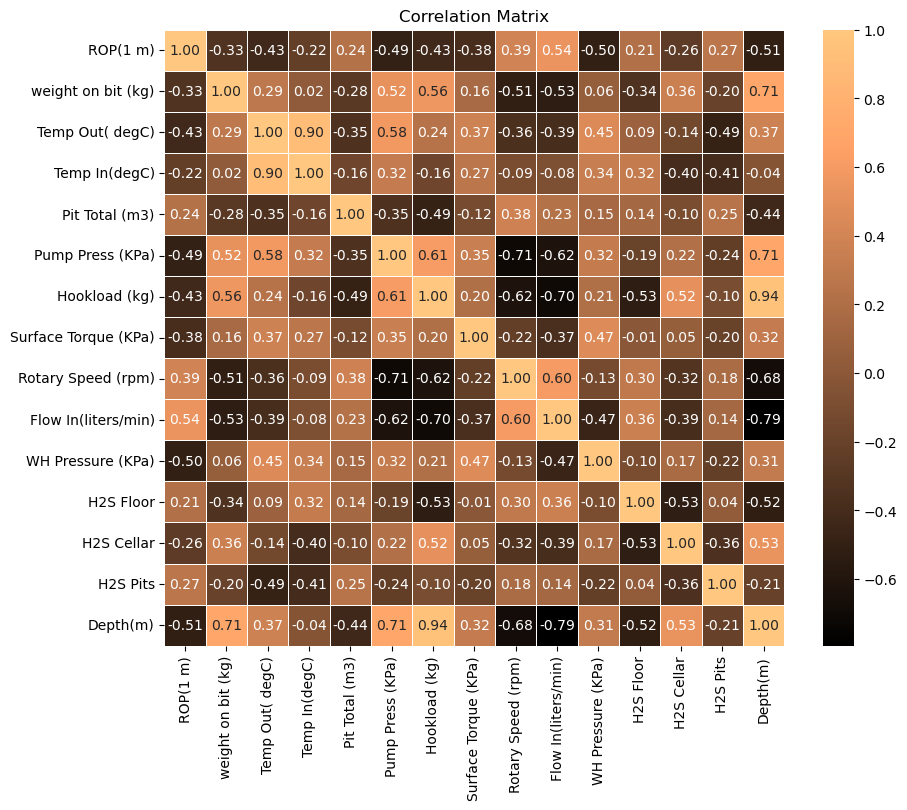

In [15]:
# Calculate correlation matrix
correlation_matrix = df1.corr()

# Display correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='copper', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Define features (X) and target variable (y)
X2 = df1.drop(columns=["ROP(1 m)"])  # Dropping ROP(1 m) as it's the target variable
y2 = df1["ROP(1 m)"]

## Normalization
### Min-Max

In [17]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Perform min-max normalization on the DataFrame
X2 = pd.DataFrame(scaler.fit_transform(X2), columns=X2.columns)

In [18]:
X2.describe()

weight on bit (kg)  Temp Out( degC)  Temp In(degC)  Pit Total (m3)  \
count         7311.000000      7311.000000    7311.000000     7311.000000   
mean             0.500754         0.620849       0.543384        0.605811   
std              0.177141         0.181289       0.194584        0.167536   
min              0.000000         0.000000       0.000000        0.000000   
25%              0.398392         0.474048       0.389052        0.492210   
50%              0.502251         0.603141       0.525389        0.616849   
75%              0.627653         0.775087       0.682712        0.721870   
max              1.000000         1.000000       1.000000        1.000000   

       Pump Press (KPa)  Hookload (kg)  Surface Torque (KPa)  \
count       7311.000000    7311.000000           7311.000000   
mean           0.571750       0.443988              0.478638   
std            0.224975       0.217852              0.177524   
min            0.000000       0.000000              0.000000   
25%            0.296103       0.225629              0.427600   
50%            0.647845       0.434572              0.512340   
75%            0.756591       0.644090              0.574377   
max            1.000000       1.000000              1.000000   

       Rotary Speed (rpm)  Flow In(liters/min)  WH Pressure (KPa)  \
count         7311.000000          7311.000000        7311.000000   
mean             0.208492             0.209135           0.957438   
std              0.083489             0.037600           0.178244   
min              0.000000             0.000000           0.000000   
25%              0.141650             0.178314           0.988401   
50%              0.191152             0.202625           0.990819   
75%              0.275205             0.240085           0.992675   
max              1.000000             1.000000           1.000000   

         H2S Floor   H2S Cellar     H2S Pits     Depth(m)  
count  7311.000000  7311.000000  7311.000000  7311.000000  
mean      0.069081     0.567654     0.274407     0.503265  
std       0.043691     0.168063     0.143436     0.288214  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.034091     0.466667     0.166667     0.253012  
50%       0.069081     0.567654     0.269231     0.505522  
75%       0.102273     0.666667     0.358974     0.752428  
max       1.000000     1.000000     1.000000     1.000000

In [19]:
y2.describe()

count    7311.000000
mean       12.812921
std        23.137197
min         0.220000
25%         3.480000
50%         5.490000
75%        13.500000
max       907.620000
Name: ROP(1 m), dtype: float64

In [20]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7311 entries, 0 to 7310
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   weight on bit (kg)    7311 non-null   float64
 1   Temp Out( degC)       7311 non-null   float64
 2   Temp In(degC)         7311 non-null   float64
 3   Pit Total (m3)        7311 non-null   float64
 4   Pump Press (KPa)      7311 non-null   float64
 5   Hookload (kg)         7311 non-null   float64
 6   Surface Torque (KPa)  7311 non-null   float64
 7   Rotary Speed (rpm)    7311 non-null   float64
 8   Flow In(liters/min)   7311 non-null   float64
 9   WH Pressure (KPa)     7311 non-null   float64
 10  H2S Floor             7311 non-null   float64
 11  H2S Cellar            7311 non-null   float64
 12  H2S Pits              7311 non-null   float64
 13  Depth(m)              7311 non-null   float64
dtypes: float64(14)
memory usage: 799.8 KB


In [21]:
y2.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7311 entries, 0 to 7310
Series name: ROP(1 m)
Non-Null Count  Dtype  
--------------  -----  
7311 non-null   float64
dtypes: float64(1)
memory usage: 57.2 KB


In [22]:
X2.head()

weight on bit (kg)  Temp Out( degC)  Temp In(degC)  Pit Total (m3)  \
0            0.500754         0.139207       0.095979        0.953260   
1            0.500754         0.139739       0.095098        0.953260   
2            0.500754         0.150386       0.096566        0.944028   
3            0.500754         0.153314       0.100382        0.944028   
4            0.500754         0.153846       0.100969        0.944028   

   Pump Press (KPa)  Hookload (kg)  Surface Torque (KPa)  Rotary Speed (rpm)  \
0          0.203523       0.036988              0.032060            0.553559   
1          0.201601       0.030741              0.032060            0.553559   
2          0.199327       0.030741              0.032352            0.221757   
3          0.197754       0.031974              0.032209            0.216903   
4          0.200024       0.035098              0.032209            0.222535   

   Flow In(liters/min)  WH Pressure (KPa)  H2S Floor  H2S Cellar  H2S Pits  \
0             0.326953           0.000913   0.102273    0.333333  0.474359   
1             0.326581           0.000913   0.102273    0.266667  0.474359   
2             0.324908           0.000913   0.102273    0.333333  0.461538   
3             0.324350           0.000913   0.069081    0.333333  0.474359   
4             0.324782           0.000913   0.090909    0.400000  0.474359   

   Depth(m)  
0  0.000000  
1  0.000137  
2  0.000277  
3  0.000414  
4  0.000564

In [23]:
X2.tail()

weight on bit (kg)  Temp Out( degC)  Temp In(degC)  Pit Total (m3)  \
7306            0.646302         0.810487       0.590842        0.636469   
7307            0.639443         0.810487       0.589375        0.636469   
7308            0.633441         0.813415       0.590842        0.637623   
7309            0.657235         0.816875       0.592603        0.645701   
7310            0.647374         0.817940       0.591429        0.643393   

      Pump Press (KPa)  Hookload (kg)  Surface Torque (KPa)  \
7306          0.701352       0.833142              0.555985   
7307          0.708997       0.835772              0.551086   
7308          0.681897       0.838073              0.561398   
7309          0.636729       0.828950              0.529486   
7310          0.631166       0.832731              0.542863   

      Rotary Speed (rpm)  Flow In(liters/min)  WH Pressure (KPa)  H2S Floor  \
7306            0.123087             0.174510           0.990659   0.034091   
7307            0.122606             0.176217           0.990659   0.034091   
7308            0.122383             0.182518           0.990971   0.022727   
7309            0.128941             0.179893           0.990971   0.034091   
7310            0.119938             0.290010           0.990971   0.034091   

      H2S Cellar  H2S Pits  Depth(m)  
7306    0.666667  0.153846  0.999458  
7307    0.600000  0.153846  0.999590  
7308    0.600000  0.166667  0.999727  
7309    0.666667  0.166667  0.999863  
7310    0.733333  0.153846  1.000000

In [24]:
y2.head()

0     17.31
1     18.63
2      5.66
3     11.67
4    120.20
Name: ROP(1 m), dtype: float64

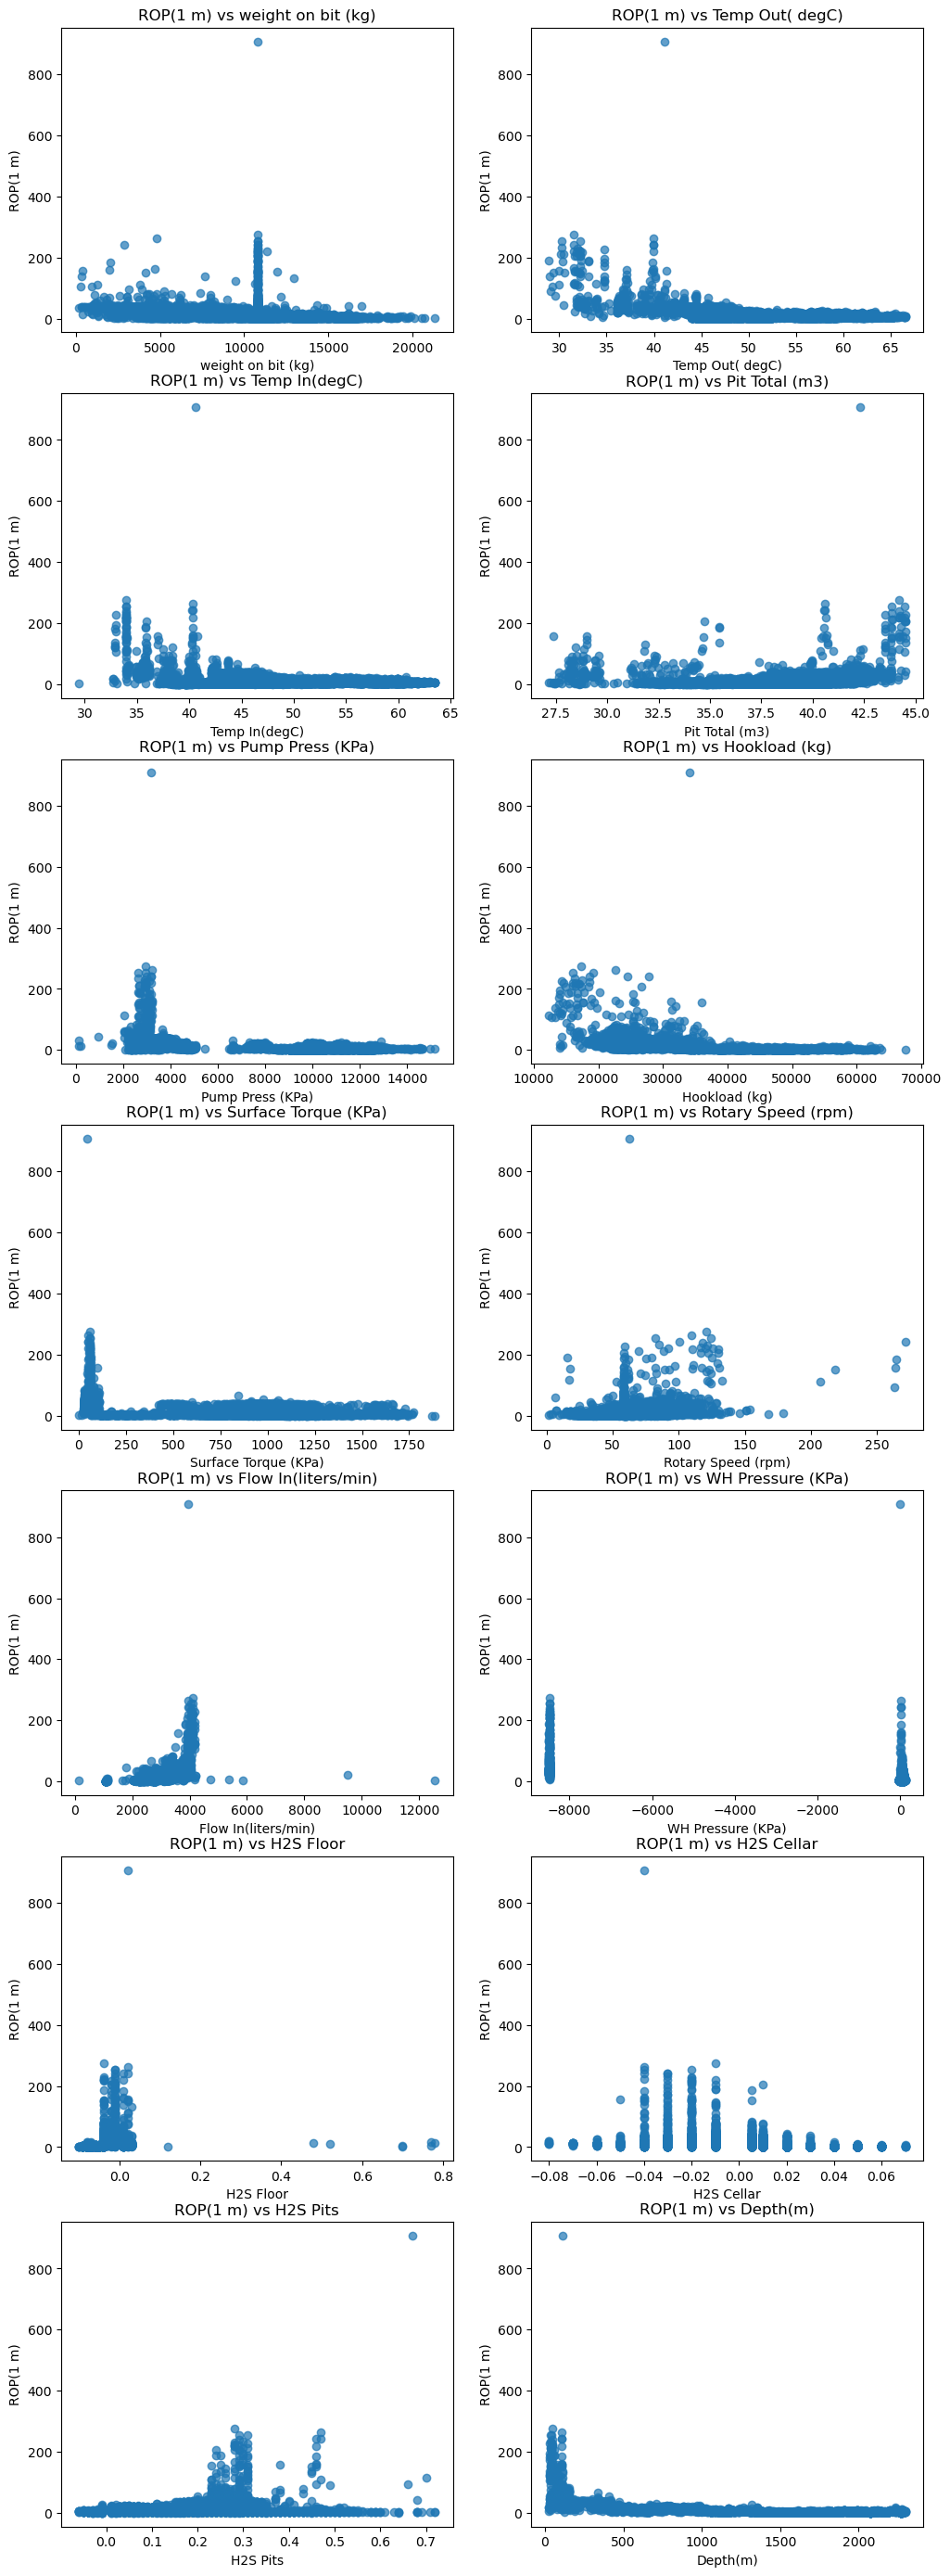

In [25]:
# Choose the attribute against which you want to plot others
output_variable = 'ROP(1 m)'
input_attributes = [col for col in df1.columns if col != output_variable]

# Calculate the number of rows required for subplots
num_rows = (len(input_attributes) + 1) // 2

# Set up the figure and axes
fig, axs = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))

# Flatten the axis array if it's more than one row
if num_rows > 1:
    axs = axs.flatten()

for i, attribute in enumerate(input_attributes):
    row = i // 2
    col = i % 2
    axs[i].scatter(df1[attribute], df1[output_variable], alpha=0.7)
    axs[i].set_title(f"{output_variable} vs {attribute}")
    axs[i].set_xlabel(attribute)
    axs[i].set_ylabel(output_variable)

# If there's an odd number of input attributes, remove the last subplot
if len(input_attributes) % 2 == 1:
    fig.delaxes(axs[-1])

In [26]:
# Split data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

model2 = LinearRegression()
# Fit the model on the training data
model2.fit(X_train_2, y_train_2)

# Make predictions on the testing data
prediction2 = model2.predict(X_test_2)

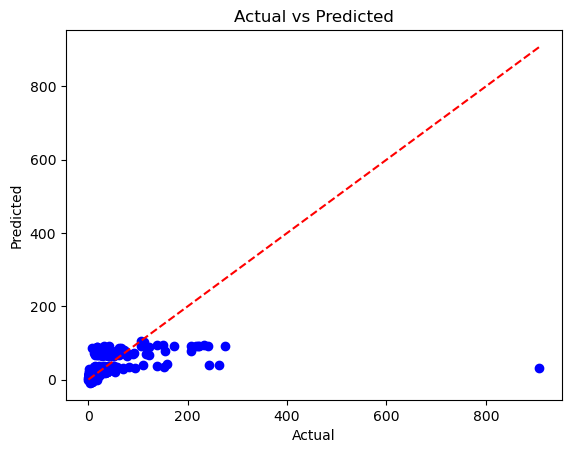

In [27]:
# Plotting actual vs predicted values
plt.scatter(y_test_2, prediction2, color='blue')
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], linestyle='--', color='red')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [28]:
w2 = model2.coef_
b2 = model2.intercept_

w2, b2

(array([-19.03748221, -43.83276259,  34.26215939,  18.82596886,
        -16.34760028, -16.25782824,  -8.76266541,   0.71021968,
         77.98044569, -51.74549469,  20.56696755,  -6.26859163,
          1.73657132,  28.13672336]),
 60.83599060355121)

In [29]:
mse_train2 = mean_squared_error(y_train_2, model2.predict(X_train_2))
mse_test2 = mean_squared_error(y_test_2, model2.predict(X_test_2))

print(f"RMSE on the training data: {np.sqrt(mse_train2)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test2)}")

RMSE on the training data: 13.119144560003097

RMSE on the test data: 24.22608647499602


In [30]:
r2_train2 = r2_score(y_train_2, model2.predict(X_train_2))
r2_test2 = r2_score(y_test_2, model2.predict(X_test_2))
print(r2_train2)
print(r2_test2)

0.5741379401175413
0.3016423582097669


## Normalizing with Z-score

In [31]:
# Initialize StandardScaler
z_scaler = StandardScaler()

y3 = df1["ROP(1 m)"]
# Fit scaler to the data and transform the data
df3 = pd.DataFrame(z_scaler.fit_transform(df1), columns=df1.columns)

In [32]:
X3=df3.drop(columns=["ROP(1 m)"])

In [33]:
df3.describe()

ROP(1 m)  weight on bit (kg)  Temp Out( degC)  Temp In(degC)  \
count  7.311000e+03        7.311000e+03     7.311000e+03   7.311000e+03   
mean  -6.220043e-17       -3.110022e-16    -9.330065e-16  -4.354030e-16   
std    1.000068e+00        1.000068e+00     1.000068e+00   1.000068e+00   
min   -5.443089e-01       -2.827053e+00    -3.424874e+00  -2.792729e+00   
25%   -4.034006e-01       -5.778943e-01    -8.098160e-01  -7.931912e-01   
50%   -3.165216e-01        8.450113e-03    -9.768621e-02  -9.248558e-02   
75%    2.969790e-02        7.164179e-01     8.508412e-01   7.160789e-01   
max    3.867661e+01        2.818538e+00     2.091562e+00   2.346785e+00   

       Pit Total (m3)  Pump Press (KPa)  Hookload (kg)  Surface Torque (KPa)  \
count    7.311000e+03      7.311000e+03   7.311000e+03          7.311000e+03   
mean     2.799019e-16     -6.220043e-17   1.244009e-16          1.866013e-16   
std      1.000068e+00      1.000068e+00   1.000068e+00          1.000068e+00   
min     -3.616249e+00     -2.541571e+00  -2.038169e+00         -2.696374e+00   
25%     -6.781136e-01     -1.225319e+00  -1.002399e+00         -2.875182e-01   
50%      6.589256e-02      3.382634e-01  -4.322673e-02          1.898563e-01   
75%      6.927866e-01      8.216670e-01   9.185867e-01          5.393376e-01   
max      2.353023e+00      1.903679e+00   2.552425e+00          2.937052e+00   

       Rotary Speed (rpm)  Flow In(liters/min)  WH Pressure (KPa)  \
count         7311.000000         7.311000e+03        7311.000000   
mean             0.000000        -6.842047e-16           0.000000   
std              1.000068         1.000068e+00           1.000068   
min             -2.497413        -5.562536e+00          -5.371867   
25%             -0.800659        -8.197750e-01           0.173724   
50%             -0.207704        -1.731663e-01           0.187292   
75%              0.799119         8.231988e-01           0.197708   
max              9.481061         2.103527e+01           0.238803   

          H2S Floor    H2S Cellar      H2S Pits      Depth(m)  
count  7.311000e+03  7.311000e+03  7.311000e+03  7.311000e+03  
mean   2.177015e-16  6.220043e-17  1.088508e-16  1.866013e-16  
std    1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00  
min   -1.581259e+00 -3.377851e+00 -1.913233e+00 -1.746272e+00  
25%   -8.009239e-01 -6.009295e-01 -7.511915e-01 -8.683493e-01  
50%    1.804887e-16 -3.440851e-17 -3.608918e-02  7.831564e-03  
75%    7.597463e-01  5.891797e-01  5.896253e-01  8.645696e-01  
max    2.130857e+01  2.572695e+00  5.059015e+00  1.723615e+00

In [34]:
X3.describe()

weight on bit (kg)  Temp Out( degC)  Temp In(degC)  Pit Total (m3)  \
count        7.311000e+03     7.311000e+03   7.311000e+03    7.311000e+03   
mean        -3.110022e-16    -9.330065e-16  -4.354030e-16    2.799019e-16   
std          1.000068e+00     1.000068e+00   1.000068e+00    1.000068e+00   
min         -2.827053e+00    -3.424874e+00  -2.792729e+00   -3.616249e+00   
25%         -5.778943e-01    -8.098160e-01  -7.931912e-01   -6.781136e-01   
50%          8.450113e-03    -9.768621e-02  -9.248558e-02    6.589256e-02   
75%          7.164179e-01     8.508412e-01   7.160789e-01    6.927866e-01   
max          2.818538e+00     2.091562e+00   2.346785e+00    2.353023e+00   

       Pump Press (KPa)  Hookload (kg)  Surface Torque (KPa)  \
count      7.311000e+03   7.311000e+03          7.311000e+03   
mean      -6.220043e-17   1.244009e-16          1.866013e-16   
std        1.000068e+00   1.000068e+00          1.000068e+00   
min       -2.541571e+00  -2.038169e+00         -2.696374e+00   
25%       -1.225319e+00  -1.002399e+00         -2.875182e-01   
50%        3.382634e-01  -4.322673e-02          1.898563e-01   
75%        8.216670e-01   9.185867e-01          5.393376e-01   
max        1.903679e+00   2.552425e+00          2.937052e+00   

       Rotary Speed (rpm)  Flow In(liters/min)  WH Pressure (KPa)  \
count         7311.000000         7.311000e+03        7311.000000   
mean             0.000000        -6.842047e-16           0.000000   
std              1.000068         1.000068e+00           1.000068   
min             -2.497413        -5.562536e+00          -5.371867   
25%             -0.800659        -8.197750e-01           0.173724   
50%             -0.207704        -1.731663e-01           0.187292   
75%              0.799119         8.231988e-01           0.197708   
max              9.481061         2.103527e+01           0.238803   

          H2S Floor    H2S Cellar      H2S Pits      Depth(m)  
count  7.311000e+03  7.311000e+03  7.311000e+03  7.311000e+03  
mean   2.177015e-16  6.220043e-17  1.088508e-16  1.866013e-16  
std    1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00  
min   -1.581259e+00 -3.377851e+00 -1.913233e+00 -1.746272e+00  
25%   -8.009239e-01 -6.009295e-01 -7.511915e-01 -8.683493e-01  
50%    1.804887e-16 -3.440851e-17 -3.608918e-02  7.831564e-03  
75%    7.597463e-01  5.891797e-01  5.896253e-01  8.645696e-01  
max    2.130857e+01  2.572695e+00  5.059015e+00  1.723615e+00

In [35]:
y3.describe()

count    7311.000000
mean       12.812921
std        23.137197
min         0.220000
25%         3.480000
50%         5.490000
75%        13.500000
max       907.620000
Name: ROP(1 m), dtype: float64

In [36]:
# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

model3 = LinearRegression()
# Fit the model on the training data
model3.fit(X_train_3, y_train_3)

# Make predictions on the testing data
prediction3 = model3.predict(X_test_3)

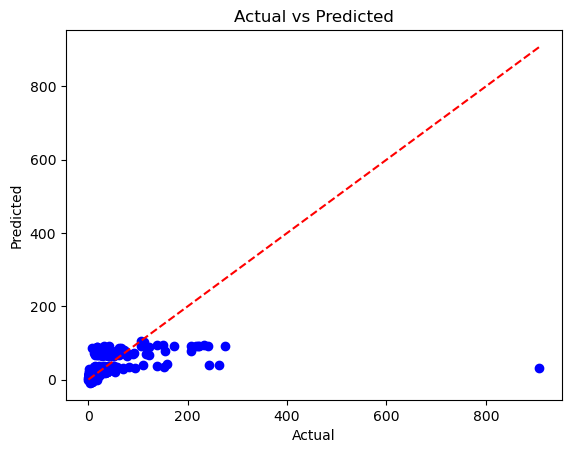

In [37]:
# Plotting actual vs predicted values
plt.scatter(y_test_3, prediction3, color='blue')
plt.plot([y_test_3.min(), y_test_3.max()], [y_test_3.min(), y_test_3.max()], linestyle='--', color='red')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [38]:
w3 = model3.coef_
b3 = model3.intercept_

w3, b3

(array([-3.37209738, -7.94584814,  6.66642087,  3.15381342, -3.67754346,
        -3.54155272, -1.55547716,  0.05929133,  2.93183717, -9.22269352,
         0.89851991, -1.05344811,  0.24906909,  8.10883074]),
 12.765273052283394)

In [39]:
mse_train3 = mean_squared_error(y_train_3, model3.predict(X_train_3))
mse_test3 = mean_squared_error(y_test_3, model3.predict(X_test_3))

print(f"RMSE on the training data: {np.sqrt(mse_train3)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test3)}")

RMSE on the training data: 13.119144560003097

RMSE on the test data: 24.22608647499602


In [40]:
r2_train3 = r2_score(y_train_3, model3.predict(X_train_3))
r2_test3 = r2_score(y_test_3, model3.predict(X_test_3))
print(r2_train3)
print(r2_test3)

0.5741379401175413
0.3016423582097669


# WEEK-6

## Filtering the max value of ROP in dataframe

In [41]:
# Define the minimum and maximum values for your range
min_value = 0
max_value = 300

# Remove outliers or values outside the specified range
df_fil = df1[(df1['ROP(1 m)'] >= min_value) & (df1['ROP(1 m)'] <= max_value)]


In [42]:
df_fil['ROP(1 m)']

0        17.31
1        18.63
2         5.66
3        11.67
4       120.20
         ...  
7306      3.29
7307      4.12
7308      3.85
7309      4.49
7310      3.95
Name: ROP(1 m), Length: 7310, dtype: float64

In [43]:
df_fil.describe()

ROP(1 m)  weight on bit (kg)  Temp Out( degC)  Temp In(degC)  \
count  7310.000000         7310.000000      7310.000000    7310.000000   
mean     12.690512        10775.593789        52.256819      47.954098   
std      20.635916         3747.943274         6.810245       6.629378   
min       0.220000          181.410000        28.930000      29.440000   
25%       3.480000         8608.842500        46.740000      42.710000   
50%       5.490000        10807.260000        51.600000      47.340000   
75%      13.487500        13460.320000        58.050000      52.700000   
max     274.750000        21337.870000        66.500000      63.510000   

       Pit Total (m3)  Pump Press (KPa)  Hookload (kg)  Surface Torque (KPa)  \
count     7310.000000       7310.000000    7310.000000           7310.000000   
mean        37.668068       8734.204457   36864.585283            903.991349   
std          2.903096       3381.981886   12020.658909            334.706184   
min         27.170000        137.490000   12367.350000              1.100000   
25%         35.700000       4590.550000   24816.330000            807.610000   
50%         37.860000       9877.500000   36349.205000            967.440000   
75%         39.680000      11512.440000   47904.760000           1084.450000   
max         44.500000      15171.960000   67541.950000           1887.230000   

       Rotary Speed (rpm)  Flow In(liters/min)  WH Pressure (KPa)  \
count         7310.000000          7310.000000        7310.000000   
mean            57.959190          2736.981765        -246.604529   
std             22.534265           466.728877        1535.408931   
min              1.690000           140.100000       -8493.470000   
25%             39.920000          2354.410000          20.130000   
50%             53.280000          2656.185000          40.960000   
75%             75.972500          3121.260000          56.950000   
max            271.580000         12558.140000         120.040000   

         H2S Floor   H2S Cellar     H2S Pits     Depth(m)  
count  7310.000000  7310.000000  7310.000000  7310.000000  
mean     -0.039217     0.005154     0.153967  1169.009190  
std       0.038444     0.025206     0.111725   654.454879  
min      -0.100000    -0.080000    -0.060000    25.960000  
25%      -0.070000    -0.010000     0.070000   600.777500  
50%      -0.039208     0.005148     0.150000  1174.140000  
75%      -0.010000     0.020000     0.220000  1734.785000  
max       0.780000     0.070000     0.720000  2296.940000

In [44]:
z_scaler = StandardScaler()

y3 = df_fil["ROP(1 m)"]
# Fit scaler to the data and transform the data
X_fil = pd.DataFrame(z_scaler.fit_transform(df_fil), columns=df_fil.columns)

In [45]:
X_fil=X_fil.drop(columns=["ROP(1 m)"])

In [46]:
X_fil.describe()

weight on bit (kg)  Temp Out( degC)  Temp In(degC)  Pit Total (m3)  \
count        7.310000e+03     7.310000e+03   7.310000e+03    7.310000e+03   
mean        -2.488358e-16    -1.088656e-15   1.244179e-15   -7.465073e-16   
std          1.000068e+00     1.000068e+00   1.000068e+00    1.000068e+00   
min         -2.826859e+00    -3.425488e+00  -2.792926e+00   -3.616411e+00   
25%         -5.781570e-01    -8.101319e-01  -7.910934e-01   -6.779670e-01   
50%          8.449535e-03    -9.645238e-02  -9.263923e-02    6.611726e-02   
75%          7.163689e-01     8.507149e-01   7.159384e-01    6.930771e-01   
max          2.818345e+00     2.091577e+00   2.346670e+00    2.353487e+00   

       Pump Press (KPa)  Hookload (kg)  Surface Torque (KPa)  \
count      7.310000e+03   7.310000e+03          7.310000e+03   
mean       6.220894e-17  -1.244179e-16         -2.021791e-16   
std        1.000068e+00   1.000068e+00          1.000068e+00   
min       -2.542090e+00  -2.038067e+00         -2.697749e+00   
25%       -1.225299e+00  -1.002364e+00         -2.879778e-01   
50%        3.380780e-01  -4.287748e-02          1.895782e-01   
75%        8.215377e-01   9.184962e-01          5.391923e-01   
max        1.903675e+00   2.552228e+00          2.937818e+00   

       Rotary Speed (rpm)  Flow In(liters/min)  WH Pressure (KPa)  \
count        7.310000e+03         7.310000e+03       7.310000e+03   
mean        -2.799402e-16        -2.488358e-16      -1.555223e-17   
std          1.000068e+00         1.000068e+00       1.000068e+00   
min         -2.497221e+00        -5.564386e+00      -5.371487e+00   
25%         -8.005774e-01        -8.197434e-01       1.737340e-01   
50%         -2.076620e-01        -1.731247e-01       1.873014e-01   
75%          7.994289e-01         8.233999e-01       1.977162e-01   
max          9.480470e+00         2.104397e+01       2.388091e-01   

          H2S Floor    H2S Cellar      H2S Pits      Depth(m)  
count  7.310000e+03  7.310000e+03  7.310000e+03  7.310000e+03  
mean   1.244179e-16  6.220894e-17  3.110447e-17 -6.220894e-17  
std    1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00  
min   -1.581197e+00 -3.378606e+00 -1.915260e+00 -1.746686e+00  
25%   -8.007884e-01 -6.012654e-01 -7.516036e-01 -8.683113e-01  
50%    2.107012e-04 -2.450492e-04 -3.550753e-02  7.840358e-03  
75%    7.600283e-01  5.890237e-01  5.910765e-01  8.645585e-01  
max    2.131078e+01  2.572839e+00  5.066677e+00  1.723584e+00

## no_outliers Linear Model implementation

In [47]:
# Split data into training and testing sets
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_fil, y3, test_size=0.3, random_state=42)

modelno = LinearRegression()
# Fit the model on the training data
modelno.fit(X_train_no, y_train_no)

# Make predictions on the testing data
predictionno = modelno.predict(X_test_no)

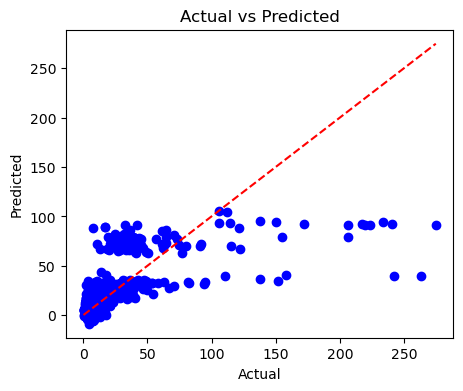

In [48]:
# Plotting actual vs predicted values
plt.figure(figsize=(5, 4))
plt.scatter(y_test_no, predictionno, color='blue')
plt.plot([y_test_no.min(), y_test_no.max()], [y_test_no.min(), y_test_no.max()], linestyle='--', color='red')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [49]:
wno = modelno.coef_
bno = modelno.intercept_

wno, bno

(array([-3.42389119, -8.48419862,  7.03743596,  3.18164897, -3.68571291,
        -3.87902047, -1.616683  , -0.03327037,  2.94438504, -9.26003766,
         1.37800264, -1.00762555,  0.14369109,  8.94128816]),
 12.728416133495642)

In [50]:
mse_trainno = mean_squared_error(y_train_no, modelno.predict(X_train_no))
mse_testno = mean_squared_error(y_test_no, modelno.predict(X_test_no))

print(f"RMSE on the training data: {np.sqrt(mse_trainno)}")
print(f"RMSE on the test data: {np.sqrt(mse_testno)}")

RMSE on the training data: 13.022678961451128
RMSE on the test data: 15.620502817101768


In [51]:
r2_trainno = r2_score(y_train_no, modelno.predict(X_train_no))
r2_testno = r2_score(y_test_no, modelno.predict(X_test_no))
# Assuming df_filtered is your filtered DataFrame

# Print the filtered DataFrame using f-string
print(f"Rsquared value for Training:\t{round(r2_trainno,2)}")
print(f"Rsquared value for Testing:\t{round(r2_testno,2)}")

Rsquared value for Training:	0.58
Rsquared value for Testing:	0.5


## Transforming the Target Variable(Log)

from sklearn.preprocessing import StandardScaler
### Initialize StandardScaler
z_scaler = StandardScaler()

### Fit scaler to the data and transform the data
df3 = pd.DataFrame(z_scaler.fit_transform(df1), columns=df1.columns)

In [52]:
X4 = df_fil.drop(columns=["ROP(1 m)", "Depth(m)"])
ylog = np.log1p(df_fil["ROP(1 m)"])
ylog = round(ylog, 2)

In [53]:
ylog.describe()

count    7310.000000
mean        2.148038
std         0.860543
min         0.200000
25%         1.500000
50%         1.870000
75%         2.670000
max         5.620000
Name: ROP(1 m), dtype: float64

In [54]:
df_fil["ROP(1 m)"]

0        17.31
1        18.63
2         5.66
3        11.67
4       120.20
         ...  
7306      3.29
7307      4.12
7308      3.85
7309      4.49
7310      3.95
Name: ROP(1 m), Length: 7310, dtype: float64

In [55]:
X4.describe()

weight on bit (kg)  Temp Out( degC)  Temp In(degC)  Pit Total (m3)  \
count         7310.000000      7310.000000    7310.000000     7310.000000   
mean         10775.593789        52.256819      47.954098       37.668068   
std           3747.943274         6.810245       6.629378        2.903096   
min            181.410000        28.930000      29.440000       27.170000   
25%           8608.842500        46.740000      42.710000       35.700000   
50%          10807.260000        51.600000      47.340000       37.860000   
75%          13460.320000        58.050000      52.700000       39.680000   
max          21337.870000        66.500000      63.510000       44.500000   

       Pump Press (KPa)  Hookload (kg)  Surface Torque (KPa)  \
count       7310.000000    7310.000000           7310.000000   
mean        8734.204457   36864.585283            903.991349   
std         3381.981886   12020.658909            334.706184   
min          137.490000   12367.350000              1.100000   
25%         4590.550000   24816.330000            807.610000   
50%         9877.500000   36349.205000            967.440000   
75%        11512.440000   47904.760000           1084.450000   
max        15171.960000   67541.950000           1887.230000   

       Rotary Speed (rpm)  Flow In(liters/min)  WH Pressure (KPa)  \
count         7310.000000          7310.000000        7310.000000   
mean            57.959190          2736.981765        -246.604529   
std             22.534265           466.728877        1535.408931   
min              1.690000           140.100000       -8493.470000   
25%             39.920000          2354.410000          20.130000   
50%             53.280000          2656.185000          40.960000   
75%             75.972500          3121.260000          56.950000   
max            271.580000         12558.140000         120.040000   

         H2S Floor   H2S Cellar     H2S Pits  
count  7310.000000  7310.000000  7310.000000  
mean     -0.039217     0.005154     0.153967  
std       0.038444     0.025206     0.111725  
min      -0.100000    -0.080000    -0.060000  
25%      -0.070000    -0.010000     0.070000  
50%      -0.039208     0.005148     0.150000  
75%      -0.010000     0.020000     0.220000  
max       0.780000     0.070000     0.720000

In [56]:
# Split data into training and testing sets
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X4, ylog, test_size=0.3, random_state=42)

model4 = LinearRegression()
# Fit the model on the training data
model4.fit(X_train_4, y_train_4)

# Make predictions on the testing data
prediction4 = model4.predict(X_test_4)

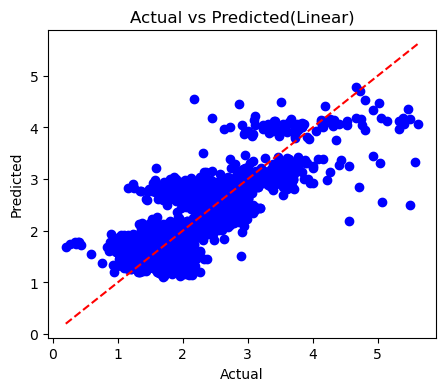

In [57]:
# Plotting actual vs predicted values
plt.figure(figsize=(5, 4))
plt.scatter(y_test_4, prediction4, color='blue')
plt.plot([y_test_4.min(), y_test_4.max()], [y_test_4.min(), y_test_4.max()], linestyle='--', color='red')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted(Linear)')
plt.show()

In [58]:
w4 = model4.coef_
b4 = model4.intercept_

w4, b4

(array([-3.85132428e-05,  5.28951340e-03,  6.17334519e-03,  2.21454581e-02,
        -9.11128945e-05, -1.84989019e-05, -7.34194735e-05, -5.28776300e-03,
         2.51716292e-04, -1.19424543e-04,  1.83913801e+00, -2.21244771e+00,
        -1.05834573e-01]),
 2.389215521809554)

In [59]:
# Fit the LinearRegression model on the training data
mse_train4 = mean_squared_error(y_train_4, model4.predict(X_train_4))
mse_test4 = mean_squared_error(y_test_4, model4.predict(X_test_4))

print(f"RMSE on the training data: {np.sqrt(mse_train4)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test4)}")

RMSE on the training data: 0.44918701918997267

RMSE on the test data: 0.46657505124035276


In [60]:
r2_train4 = r2_score(y_train_4, model4.predict(X_train_4))
r2_test4 = r2_score(y_test_4, model4.predict(X_test_4))
# Print the filtered DataFrame using f-string
print(f"Rsquared value for Training:\t{round(r2_train4,2)}")
print(f"Rsquared value for Testing:\t{round(r2_test4,2)}")

Rsquared value for Training:	0.72
Rsquared value for Testing:	0.72


## WEEK-7

## Alternatives of Y-transformation:
### sqrt()

In [61]:
ys = np.sqrt(df_fil["ROP(1 m)"])
ys = round(ys, 2)

In [62]:
df_fil["ROP(1 m)"].head()

0     17.31
1     18.63
2      5.66
3     11.67
4    120.20
Name: ROP(1 m), dtype: float64

In [63]:
ys.describe()

count    7310.000000
mean        3.055984
std         1.830501
min         0.470000
25%         1.870000
50%         2.340000
75%         3.670000
max        16.580000
Name: ROP(1 m), dtype: float64

In [64]:
# Split data into training and testing sets
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X4, ys, test_size=0.3, random_state=42)

model5 = LinearRegression()
# Fit the model on the training data
model5.fit(X_train_5, y_train_5)

# Make predictions on the testing data
prediction5 = model5.predict(X_test_5)

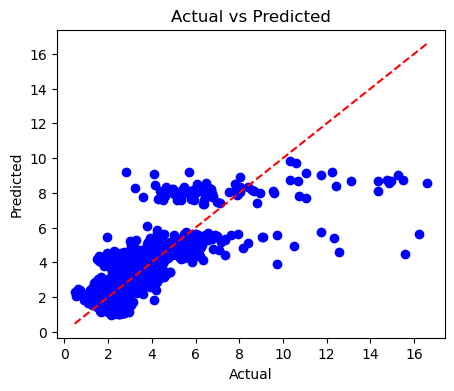

In [65]:
# Plotting actual vs predicted values
plt.figure(figsize=(5, 4))
plt.scatter(y_test_5, prediction5, color='blue')
plt.plot([y_test_5.min(), y_test_5.max()], [y_test_5.min(), y_test_5.max()], linestyle='--', color='red')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [66]:
w5 = model5.coef_
b5 = model5.intercept_

w5, b5

(array([-7.61881888e-05, -1.56143498e-02,  2.41396128e-02,  7.45800710e-02,
        -1.64455713e-04, -2.00234499e-05, -2.55384550e-04, -7.75802580e-03,
         5.03961479e-04, -3.90554720e-04,  3.18249357e+00, -3.08958459e+00,
         1.78562046e-01]),
 2.2213073641512127)

In [67]:
# Fit the LinearRegression model on the training data
mse_train5 = mean_squared_error(y_train_5, model5.predict(X_train_4))
mse_test5 = mean_squared_error(y_test_5, model5.predict(X_test_4))

print(f"RMSE on the training data: {np.sqrt(mse_train5)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test5)}")

RMSE on the training data: 0.989178865270729

RMSE on the test data: 1.1051214602525286


In [68]:
r2_train5 = r2_score(y_train_5, model5.predict(X_train_5))
r2_test5 = r2_score(y_test_5, model5.predict(X_test_5))
# Print the filtered DataFrame using f-string
print(f"Rsquared value for Training:\t{round(r2_train5,2)}")
print(f"Rsquared value for Testing:\t{round(r2_test5,2)}")

Rsquared value for Training:	0.7
Rsquared value for Testing:	0.66


## cbrt()

In [69]:
yc = np.cbrt(df_fil["ROP(1 m)"])
yc = round(yc, 2)

In [70]:
yc.describe()

count    7310.000000
mean        2.041378
std         0.753435
min         0.600000
25%         1.520000
50%         1.760000
75%         2.380000
max         6.500000
Name: ROP(1 m), dtype: float64

In [71]:
# Split data into training and testing sets
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X4, yc, test_size=0.3, random_state=42)

model6 = LinearRegression()
# Fit the model on the training data
model6.fit(X_train_6, y_train_6)

# Make predictions on the testing data
prediction6 = model6.predict(X_test_6)

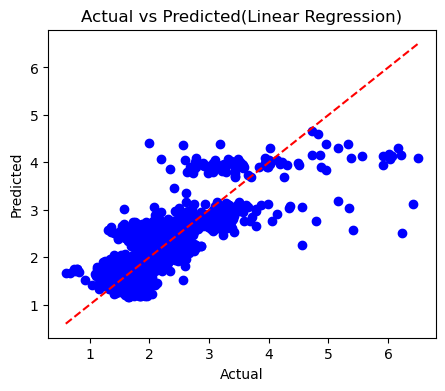

In [72]:
# Plotting actual vs predicted values
plt.figure(figsize=(5, 4))
plt.scatter(y_test_6, prediction6, color='blue')
plt.plot([y_test_6.min(), y_test_6.max()], [y_test_6.min(), y_test_6.max()], linestyle='--', color='red')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted(Linear Regression)')
plt.show()

In [73]:
# Fit the LinearRegression model on the training data
mse_train6 = mean_squared_error(y_train_6, model6.predict(X_train_4))
mse_test6 = mean_squared_error(y_test_6, model6.predict(X_test_4))

print(f"RMSE on the training data: {np.sqrt(mse_train6)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test6)}")

RMSE on the training data: 0.39736500781714673

RMSE on the test data: 0.430296067554403


In [74]:
r2_train6 = r2_score(y_train_6, model6.predict(X_train_6))
r2_test6 = r2_score(y_test_6, model6.predict(X_test_6))
# Print the filtered DataFrame using f-string
print(f"Rsquared value for Training:\t{round(r2_train6,2)}")
print(f"Rsquared value for Testing:\t{round(r2_test6,2)}")

Rsquared value for Training:	0.72
Rsquared value for Testing:	0.69


## Decision Tree

In [75]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X4, ylog, test_size=0.3, random_state=42)

In [76]:
from sklearn.tree import DecisionTreeRegressor
# Create a decision tree classifier


In [77]:
modelDT = DecisionTreeRegressor(random_state=42)
# Fit the model on the training data
modelDT.fit(X_train, y_train)

# Make predictions on the testing data
predictionDT = modelDT.predict(X_test)

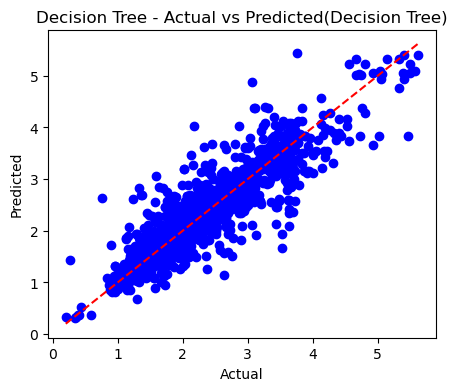

In [78]:
# Plotting actual vs predicted values
plt.figure(figsize=(5, 4))
plt.scatter(y_test, predictionDT, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree - Actual vs Predicted(Decision Tree)')
plt.show()

In [79]:
# Fit the DecisionTree model on the training data
mse_trainDT = mean_squared_error(y_train, modelDT.predict(X_train))
mse_testDT = mean_squared_error(y_test, modelDT.predict(X_test))

print(f"RMSE on the training data: {np.sqrt(mse_trainDT)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_testDT)}")

RMSE on the training data: 3.1807326472022276e-17

RMSE on the test data: 0.31625141372070825


In [80]:
r2_trainDT = r2_score(y_train, modelDT.predict(X_train))
r2_testDT = r2_score(y_test, modelDT.predict(X_test))
# Print the filtered DataFrame using f-string
print(f"Rsquared value for Training:\t{round(r2_trainDT,2)}")
print(f"Rsquared value for Testing:\t{round(r2_testDT,2)}")

Rsquared value for Training:	1.0
Rsquared value for Testing:	0.87


## Random Forest

In [ ]:
modelRF = RandomForestRegressor(random_state=42)
# Fit the model on the training data
modelRF.fit(X_train, y_train)

# Make predictions on the testing data
predictionRF = modelRF.predict(X_test)

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(5, 4))
plt.scatter(y_test, predictionRF, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest - Actual vs Predicted(Random Forest)')
plt.show()

In [ ]:
# Fit the DecisionTree model on the training data


mse_trainRF = mean_squared_error(y_train, modelRF.predict(X_train))
mse_testRF = mean_squared_error(y_test, modelRF.predict(X_test))

print(f"RMSE on the training data: {np.sqrt(mse_trainRF)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_testRF)}")

In [ ]:
r2_trainRF = r2_score(y_train, modelRF.predict(X_train))
r2_testRF = r2_score(y_test, modelRF.predict(X_test))
# Print the filtered DataFrame using f-string
print(f"Rsquared value for Training:\t{round(r2_trainRF,2)}")
print(f"Rsquared value for Testing:\t{round(r2_testRF,2)}")

## KNN

In [ ]:
# Creating the KNN Regression model
model = KNeighborsRegressor(n_neighbors=5)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X4, ylog, test_size=0.3, random_state=42)

# Creating the KNN Regression model
modelKNN = KNeighborsRegressor(n_neighbors=5)
# Fit the model on the training data
modelKNN.fit(X_train, y_train)

# Make predictions on the testing data
predictionKNN = modelKNN.predict(X_test)

In [ ]:

plt.figure(figsize=(5, 4))
# Plotting actual vs predicted values
plt.scatter(y_test, predictionKNN, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN - Actual vs Predicted(KNN)')
plt.show()

In [ ]:
# Fit the DecisionTree model on the training data


mse_trainKNN = mean_squared_error(y_train, modelKNN.predict(X_train))
mse_testKNN = mean_squared_error(y_test, modelKNN.predict(X_test))

print(f"RMSE on the training data: {np.sqrt(mse_trainKNN)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_testKNN)}")

In [ ]:
r2_trainKNN = r2_score(y_train, modelKNN.predict(X_train))
r2_testKNN = r2_score(y_test, modelKNN.predict(X_test))
# Print the filtered DataFrame using f-string
print(f"Rsquared value for Training:\t{round(r2_trainKNN,2)}")
print(f"Rsquared value for Testing:\t{round(r2_testKNN,2)}")

## Understanding the patterns between Depth and ROP

In [ ]:
# Select two attributes for scatterplot
attribute1 = 'Depth(m)'  # Replace with the name of the first attribute
attribute2 = 'ROP(1 m)'   # Replace with the name of the second attribute

# Draw scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df_fil[attribute1], df_fil[attribute2], alpha=0.5)
plt.title(f'Scatterplot of {attribute1} vs {attribute2}')
plt.xlabel(attribute1)
plt.ylabel(attribute2)
plt.grid(True)
plt.show()


In [ ]:
X_train

## Week-8

### Randomized Decision Tree Model with CV

### Results for Cross-Validation: RMSE on the entire data: 0.1721700922945333 R-squared value for the entire data: 0.96 Best hyperparameters found: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 7}

In [ ]:
param_DT = {
    'max_depth': randint(3, 11),  # randint for integer values from 3 to 10
    'min_samples_split': randint(2,11),  # randint for integer values from 2 to 10
    'min_samples_leaf': randint(1,5)  # randint for integer values from 1 to 4
}

# Initialize DecisionTreeRegressor
modelDT = DecisionTreeRegressor(random_state=42)

# Initialize KFold cross-validation
kf = KFold(n_splits=10, shuffle=True)

# Initialize RandomizedSearchCV with KFold cross-validation
rand_DT = RandomizedSearchCV(estimator=modelDT, param_distributions=param_DT, cv=kf, n_iter=10, random_state=42)

# Fit RandomizedSearchCV to your data
rand_DT.fit(X_train, y_train)

# Calculate RMSE and R-squared on the entire data
mse_trainDT_random = mean_squared_error(y_train, rand_DT.predict(X_train))
r2_trainDT_random = r2_score(y_train, rand_DT.predict(X_train))

# Print the results
print("Results for Cross-Validation:")
print(f"RMSE on the entire data: {np.sqrt(mse_trainDT_random)}")
print(f"R-squared value for the entire data: {round(r2_trainDT_random, 2)}")


In [ ]:
# Print the best hyperparameters
print("Best hyperparameters found:")
print(rand_DT.best_params_)

### Predict Test_set(0.3)

In [ ]:
# Assuming you have already trained the model rand_DT

# Predict on the test set
pred_dt = rand_DT.predict(X_test)

# Calculate RMSE and R-squared on the test set
mse_test_DT = mean_squared_error(y_test, pred_dt)
r2_test_DT = r2_score(y_test, pred_dt)

# Print the results
print("Results for Test Set:")
print(f"RMSE on the test set: {np.sqrt(mse_test_DT)}")
print(f"R-squared value for the test set: {round(r2_test_DT, 2)}")


### Randomized Random Forest with CV

In [ ]:
# Define parameter distribution for randomized search
param_RF = {
    'n_estimators': randint(281, 301),  # Random integer values between 100 and 300
    'max_depth': randint(3, 11),  # Random integer values between 3 and 10
    'max_features': randint(2, 16)  # Random integer values between 2 and 15
}

# Initialize RandomForestRegressor
modelRF = RandomForestRegressor(random_state=42)

# Initialize KFold cross-validation
kf = KFold(n_splits=10, shuffle=True)

# Initialize RandomizedSearchCV with KFold cross-validation
rand_RF = RandomizedSearchCV(estimator=modelRF, param_distributions=param_RF, cv=kf, n_iter=10)

# Fit RandomizedSearchCV to your data
rand_RF.fit(X_train, y_train)

# Calculate RMSE and R-squared on the entire data
mse_trainRF_random = mean_squared_error(y_train, rand_RF.predict(X_train))
r2_trainRF_random = r2_score(y_train, rand_RF.predict(X_train))

# Print the results
print("Results for Cross-Validation:")
print(f"RMSE on the entire data: {np.sqrt(mse_trainRF_random)}")
print(f"Rsquared value for the entire data: {round(r2_trainRF_random, 2)}")


In [ ]:
# Print the best hyperparameters
print("Best hyperparameters found:")
print(rand_RF.best_params_)

Best hyperparameters found:
{'max_depth': 10, 'max_features': 10, 'n_estimators': 283}
Results for Cross-Validation:
RMSE on the entire data: 0.15802868013499488
Rsquared value for the entire data: 0.97

In [ ]:
# Assuming you have already trained the model rand_DT

# Predict on the test set
pred_rf = rand_RF.predict(X_test)

# Calculate RMSE and R-squared on the test set
mse_test_RF = mean_squared_error(y_test, pred_rf)
r2_test_RF = r2_score(y_test, pred_rf)

# Print the results
print("Results for Test Set:")
print(f"RMSE on the test set: {np.sqrt(mse_test_RF)}")
print(f"R-squared value for the test set: {round(r2_test_RF, 2)}")


### Randomized KNN with CV

In [ ]:
# Define parameter distributions for random search
param_KNN = {
    'n_neighbors': randint(1, 2),  # randint for integer values from 1 to 20
    'weights': ['uniform', 'distance'],  # Weighting schemes
    'p': [1, 2],  # L1 and L2 distance metrics
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNeighborsRegressor
modelKNN = KNeighborsRegressor()

# Initialize KFold cross-validation
kf = KFold(n_splits=10, shuffle=True)

# Initialize RandomizedSearchCV with KFold cross-validation
rand_KNN = RandomizedSearchCV(estimator=modelKNN, param_distributions=param_KNN, cv=kf, random_state=42)

# Fit RandomizedSearchCV to your data
rand_KNN.fit(X_train, y_train)

# Calculate RMSE and R-squared on the entire data
mse_trainKNN_random = mean_squared_error(y_train, rand_KNN.predict(X_train))
r2_trainKNN_random = r2_score(y_train, rand_KNN.predict(X_train))

# Print the results
print("Results for Cross-Validation:")
print(f"RMSE on the entire data: {np.sqrt(mse_trainKNN_random)}")
print(f"R-squared value for the entire data: {round(r2_trainKNN_random, 2)}")


In [ ]:
# Print the best hyperparameters
print("Best hyperparameters found:")
print(rand_KNN.best_params_)

In [ ]:
# Assuming you have already trained the model rand_DT

# Predict on the test set
pred_knn = rand_KNN.predict(X_test)

# Calculate RMSE and R-squared on the test set
mse_test_KNN = mean_squared_error(y_test, pred_knn)
r2_test_KNN = r2_score(y_test, pred_knn)

# Print the results
print("Results for Test Set:")
print(f"RMSE on the test set: {np.sqrt(mse_test_KNN)}")
print(f"R-squared value for the test set: {round(r2_test_KNN, 2)}")


### Linear Reg with CV

In [ ]:
# Initialize Linear Regression model
modelLI = LinearRegression()

# Initialize KFold cross-validation
kf = KFold(n_splits=10, shuffle=True)

# Perform cross-validation
cv_results = cross_validate(modelLI, X_train, y_train, cv=kf, scoring=('neg_mean_squared_error', 'r2'), return_train_score=True)

# Calculate RMSE and R-squared on the entire data
rmse_trainLI = -np.mean(cv_results['train_neg_mean_squared_error'])
r2_trainLI = np.mean(cv_results['train_r2'])

# Print the results
print("Results for Cross-Validation:")
print(f"RMSE on the entire data: {np.sqrt(rmse_trainLI)}")
print(f"R-squared value for the entire data: {round(r2_trainLI, 2)}")

In [ ]:
# Fit the LinearRegression model on the entire training data
modelLI.fit(X_train, y_train)

# Predict on the test set
pred_li = modelLI.predict(X_test)

# Calculate R-squared on the test set
r2_test_LI = r2_score(y_test, pred_li)
rmse_test_LI = mean_squared_error(y_test, pred_li)

# Print the results
print("Results for Test Set:")
print(f"R-squared value for the test set: {round(r2_test_LI, 2)}")
print(f"RMSE on the test set: {np.sqrt(rmse_test_LI)}")

### Plots

In [ ]:
# RMSE values for each model
rmse_values = {
    'Linear Reg': np.sqrt(rmse_trainLI),
    'Decision Tree': np.sqrt(mse_trainDT_random),
    'Random Forest': np.sqrt(mse_trainRF_random),
    'KNN': np.sqrt(mse_trainKNN_random),
}

# Plotting
plt.figure(figsize=(7, 4))
bars = plt.bar(rmse_values.keys(), rmse_values.values(), color='gray')

# Annotate the bars with their respective RMSE values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of Models based on RMSE(Training Set)')
plt.show()

In [ ]:
# RMSE values for each model
r2_values = {
    'Linear Reg': round(r2_trainLI,2),
    'Decision Tree': round(r2_trainDT_random,2),
    'Random Forest': round(r2_trainRF_random,2),
    'KNN': round(r2_trainKNN_random,2),
}

# Plotting
plt.figure(figsize=(7, 4))
bars = plt.bar(r2_values.keys(), r2_values.values(), color='gray')

# Annotate the bars with their respective RMSE values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.title('Comparative R-squared Scores of Different Models(Training Set)')
plt.show()

In [ ]:
# RMSE values for each model
rmse_values = {
    'Linear Reg': np.sqrt(rmse_test_LI),
    'Decision Tree': np.sqrt(mse_test_DT),
    'Random Forest': np.sqrt(mse_test_RF),
    'KNN': np.sqrt(mse_test_KNN),
    
}

# Plotting
plt.figure(figsize=(7, 4))
bars = plt.bar(rmse_values.keys(), rmse_values.values(), color='gray')

# Annotate the bars with their respective RMSE values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of Models based on RMSE(Test Set)')
plt.show()

In [ ]:
# RMSE values for each model
r2_values = {
    'Linear Reg': round(r2_test_LI,2),
    'Decision Tree': round(r2_test_DT,2),
    'Random Forest': round(r2_test_RF,2),
    'KNN': round(r2_test_KNN,2),
}

# Plotting
plt.figure(figsize=(7, 4))
bars = plt.bar(r2_values.keys(), r2_values.values(), color='gray')

# Annotate the bars with their respective RMSE values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.title('Comparative R-squared Scores of Different Models(Test Set)')
plt.show()

## Data Integration with Geo-physical well Data

In [ ]:
# Load Excel data into a DataFrame
excel_loc = '/Users/akashborigi/Downloads/UH_Courses/Spring_2024/cohort/geo_data.csv'
data = pd.read_csv(excel_loc)

In [ ]:
data.head()

In [ ]:
# Replace all -999.25 with NaN
data.replace(-999.25, float('nan'), inplace=True)

# Replace NaN values with column-wise mean
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        column_mean = data[column].mean()
        data[column].fillna(column_mean, inplace=True)

In [ ]:
data.head()

In [ ]:
# Replace all -999.25 with NaN
data.replace(-999.25, float('nan'), inplace=True)

# Replace NaN values with column-wise mean
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        column_mean = data[column].mean()
        data[column].fillna(column_mean, inplace=True)

In [ ]:
from sklearn.decomposition import PCA

# Assuming 'data' contains your dataset

# Select relevant attributes based on categories
attribute_categories = {
    'Acoustic': ['AF10', 'AF20', 'AF30', 'AF60', 'AF90'],
    'Optical': ['AO10', 'AO20', 'AO30', 'AO60', 'AO90'],
    'Temperature': ['AT10', 'AT20', 'AT30', 'AT60', 'AT90'],
    'Density_Porosity': ['DNPH', 'DPHZ', 'RHOZ', 'NPHI', 'NPOR', 'PEFZ'],
    'Electrical': ['ECGR', 'ED', 'GR', 'RXO8', 'RXOZ'],
    'Fluid_Properties': ['SP', 'SPAR', 'TNPH', 'HTNP_SAN'],
    'Formation_Parameters': ['GDEV', 'CDF', 'CFTC', 'CNTC', 'CTEM', 'DSOZ', 'HCAL', 'HDRA', 'HDRB',
                             'HGR', 'HMIN', 'HMNO', 'HNPO', 'HPRA', 'HTNP'],
    'Other': ['AORT', 'AORX', 'ND', 'PXND_HILT', 'RSOZ', 'RWA_HILT', 'TENS',
              'ATCO10', 'ATCO20', 'ATCO30', 'ATCO60', 'ATCO90']
}

# Empty dictionary to store the best attribute from each category
best_attributes = {}

# Loop through each category and find the attribute with the highest loading
for category, attributes in attribute_categories.items():
    # Subset the dataframe with relevant attributes
    df_subset = data[attributes]

    # Standardize the data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_subset)

    # Perform PCA
    pca = PCA(n_components=1)
    pca.fit(df_scaled)

    # Get the loadings (coefficients) of each original variable on the principal components
    loadings = pca.components_
    loadings_df = pd.DataFrame(loadings, columns=attributes)

    # Identify the best attribute based on the highest absolute loading
    best_attribute = loadings_df.abs().idxmax(axis=1)[0]
    best_attributes[category] = best_attribute

# Print the names of the best categories and attributes
print("Best attributes from each category:")
for category, attribute in best_attributes.items():
    print(f"{category}: {attribute}")

# Create DataFrame to store best attributes and depth
best_df = pd.DataFrame()
for category, attribute in best_attributes.items():
    best_df[category] = data[attribute]

# Add 'Depth (m)' column to 'best_df'
best_df['Depth(m)'] = data['Depth(m)']

print(best_df.head())


In [ ]:
import matplotlib.pyplot as plt

# Plotting the selected attributes over depth
plt.figure(figsize=(7, 7))

# Plot each category
for category, attribute in best_attributes.items():
    plt.plot(best_df['Depth(m)'], best_df[category], label=category)

# Add labels and legend
plt.xlabel('Depth (m)')
plt.ylabel('Attribute Value')
plt.title('Selected Attributes Over Depth')
plt.legend()

# Show plot
plt.show()


import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'data' contains your dataset

# Select relevant attributes based on categories
attribute_categories = {
    'Acoustic': ['AF10', 'AF20', 'AF30', 'AF60', 'AF90'],
    'Optical': ['AO10', 'AO20', 'AO30', 'AO60', 'AO90'],
    'Temperature': ['AT10', 'AT20', 'AT30', 'AT60', 'AT90'],
    'Density_Porosity': ['DNPH', 'DPHZ', 'RHOZ', 'NPHI', 'NPOR', 'PEFZ'],
    'Electrical': ['ECGR', 'ED', 'GR', 'RXO8', 'RXOZ'],
    'Fluid_Properties': ['SP', 'SPAR', 'TNPH', 'HTNP_SAN'],
    'Formation_Parameters': ['GDEV', 'CDF', 'CFTC', 'CNTC', 'CTEM', 'DSOZ', 'HCAL', 'HDRA', 'HDRB',
                             'HGR', 'HMIN', 'HMNO', 'HNPO', 'HPRA', 'HTNP'],
    'Other': ['AORT', 'AORX', 'ND', 'PXND_HILT', 'RSOZ', 'RWA_HILT', 'TENS',
              'ATCO10', 'ATCO20', 'ATCO30', 'ATCO60', 'ATCO90']
}

# Empty dictionary to store the best attribute from each category
best_attributes = {}

# Loop through each category and find the attribute with the highest loading
for category, attributes in attribute_categories.items():
    # Subset the dataframe with relevant attributes
    df_subset = data[attributes]

    # Standardize the data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_subset)

    # Perform PCA
    pca = PCA(n_components=1)
    pca.fit(df_scaled)

    # Get the loadings (coefficients) of each original variable on the principal components
    loadings = pca.components_
    loadings_df = pd.DataFrame(loadings, columns=attributes)

    # Identify the best attribute based on the highest absolute loading
    best_attribute = loadings_df.abs().idxmax(axis=1)[0]
    best_attributes[category] = best_attribute

    # Calculate Silhouette score
    silhouette_avg = silhouette_score(df_scaled, pca.fit_transform(df_scaled))
    print(f"Silhouette score for {category}: {silhouette_avg}")

# Print the names of the best categories and attributes
print("Best attributes from each category:")
for category, attribute in best_attributes.items():
    print(f"{category}: {attribute}")

# Create DataFrame to store best attributes and depth
best_df = pd.DataFrame()
for category, attribute in best_attributes.items():
    best_df[category] = data[attribute]

# Add 'Depth (m)' column to 'best_df'
best_df['Depth(m)'] = data['Depth(m)']

print(best_df.head())

In [ ]:
# Plot Silhouette scores
plt.figure(figsize=(10, 6))
categories = list(attribute_categories.keys())
silhouette_scores = [silhouette_score(data[attributes], best_df[category]) for category, attributes in attribute_categories.items()]
plt.bar(categories, silhouette_scores, color='gray')
plt.title('Silhouette Scores for Each Category')
plt.xlabel('Category')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
best_df.head()

In [ ]:
# Merge the datasets using the common key
df = pd.merge(df_fil, best_df, on='Depth(m)', how='left')

In [ ]:
df

In [ ]:
# Replace NaN values with column-wise mean
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        column_mean = df[column].mean()
        df[column].fillna(column_mean, inplace=True)

In [ ]:
df

### Output DataFrame to Excel file
merged_df.to_excel('/Users/akashborigi/Downloads/UH_Courses/Spring_2024/cohort/merge_data.xlsx', index=False)


#### Load Excel data into a DataFrame
excel = '/Users/akashborigi/Downloads/UH_Courses/Spring_2024/cohort/merge_data.xlsx'
df = pd.read_excel(excel)

In [ ]:
df

In [ ]:
X_merge = pd.DataFrame(z_scaler.fit_transform(df), columns=df.columns)
X_merge = df.drop(columns=["ROP(1 m)", "Depth(m)"])

In [ ]:
ylog_merge = np.log1p(df["ROP(1 m)"])
ylog_merge = round(ylog_merge, 2)

In [ ]:
X_merge

In [ ]:
ylog_merge

In [ ]:
# Split data into training and testing sets
X_train_mer, X_test_mer, y_train_mer, y_test_mer = train_test_split(X_merge, ylog_merge, test_size=0.3, random_state=42)

In [ ]:
# Define parameter distribution for randomized search
param_RF_mer = {
    'n_estimators': randint(100, 301),  # Random integer values between 100 and 300
    'max_depth': randint(3, 11),  # Random integer values between 3 and 10
    'max_features': randint(2, 16)  # Random integer values between 2 and 15
}

# Initialize RandomForestRegressor
modelRF_mer = RandomForestRegressor(random_state=42)

# Initialize KFold cross-validation
kf = KFold(n_splits=10, shuffle=True)

# Initialize RandomizedSearchCV with KFold cross-validation
rand_RF_mer = RandomizedSearchCV(estimator=modelRF_mer, param_distributions=param_RF, cv=kf, n_iter=10)

# Fit RandomizedSearchCV to your data
rand_RF_mer.fit(X_train_mer, y_train_mer)

# Calculate RMSE and R-squared on the entire data
mse_trainRF_random_mer = mean_squared_error(y_train_mer, rand_RF_mer.predict(X_train_mer))
r2_trainRF_random_mer = r2_score(y_train_mer, rand_RF_mer.predict(X_train_mer))

# Print the results
print("Results for Cross-Validation:")
print(f"RMSE on the entire data: {np.sqrt(mse_trainRF_random_mer)}")
print(f"Rsquared value for the entire data: {round(r2_trainRF_random_mer, 2)}")


In [ ]:
# Print the best hyperparameters
print("Best hyperparameters found:")
print(rand_RF_mer.best_params_)

In [ ]:
# Assuming you have already trained the model rand_DT

# Predict on the test set
pred_rf_mer = rand_RF_mer.predict(X_test_mer)

# Calculate RMSE and R-squared on the test set
mse_test_RF_mer = mean_squared_error(y_test_mer, pred_rf_mer)
r2_test_RF_mer = r2_score(y_test_mer, pred_rf_mer)

# Print the results
print("Results for Test Set:")
print(f"RMSE on the test set: {np.sqrt(mse_test_RF_mer)}")
print(f"R-squared value for the test set: {round(r2_test_RF_mer, 2)}")
